In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
train_data = pd.read_csv('training_data.csv')

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1928 non-null   int64  
 1   ID                1928 non-null   int64  
 2   innings           1928 non-null   int64  
 3   batter            1928 non-null   object 
 4   bowler            1928 non-null   object 
 5   batting_strength  1928 non-null   float64
 6   bowling_strength  1928 non-null   float64
 7   total_run         1928 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 120.6+ KB


In [17]:
max(train_data['bowling_strength'])

113.91135485899048

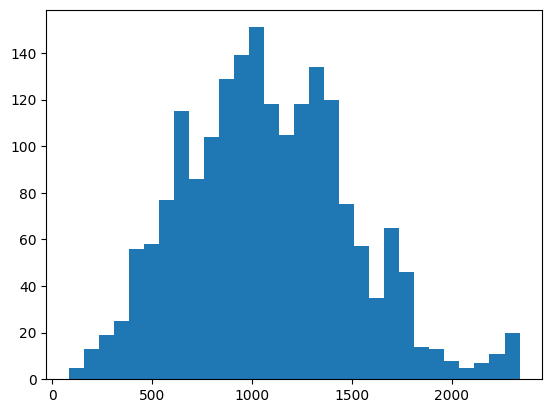

In [24]:
plt.hist(train_data['batting_strength'], bins=30);

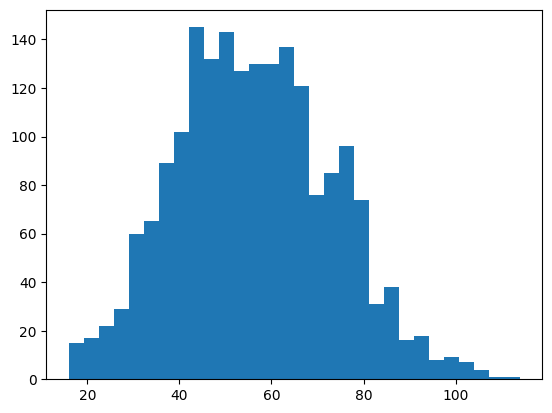

In [26]:
plt.hist(train_data['bowling_strength'], bins=30);

In [28]:
scaler = StandardScaler()

In [33]:
X = train_data[['batting_strength', 'bowling_strength']]
y = train_data['total_run']

In [37]:
trainX, testX, trainY, testY = train_test_split(X, y)

In [38]:
trainX

,batting_strength,bowling_strength
890,1679.869365,64.643732
1831,1043.933405,34.351440
1171,541.170880,46.672936
663,1334.107853,76.288227
660,450.888762,52.336850
...,...,...
1637,721.812478,52.595444
79,813.015527,38.371392
430,886.094826,43.554408
513,717.638420,51.516622


In [39]:
train_sc = scaler.fit_transform(trainX)
test_sc = scaler.transform(testX)

In [41]:
lr_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()

In [42]:
lr_model.fit(trainX, trainY)

LinearRegression()

In [43]:
decision_tree_model.fit(trainX, trainY)

DecisionTreeRegressor()

In [44]:
lr_pred = lr_model.predict(testX)
dt_pred = decision_tree_model.predict(testX)

In [46]:
mse = mean_squared_error

In [57]:
mse(lr_pred, testY)

167.95624205027943

In [58]:
mse(dt_pred, testY)

312.8407676348548

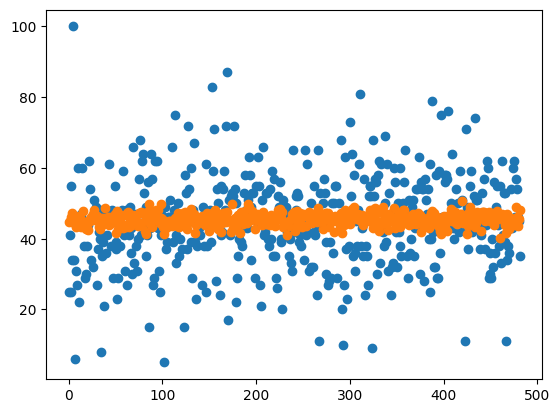

In [55]:
plt.scatter(np.arange(len(testY)), testY)
plt.scatter(np.arange(len(testY)), lr_pred)

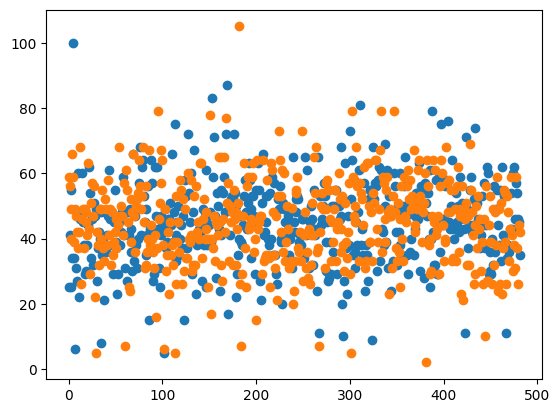

In [56]:
plt.scatter(np.arange(len(testY)), testY)
plt.scatter(np.arange(len(testY)), dt_pred)